# YOLOv8 ËÆ≠ÁªÉËá™Â∑±ÁöÑÁõÆÊ†áÊ£ÄÊµãÊï∞ÊçÆÈõÜ

üòãüòãÂÖ¨‰ºóÂè∑ÁÆóÊ≥ïÁæéÈ£üÂ±ãÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆËØçÔºö**torchkeras**ÔºåËé∑ÂèñÊú¨ÊñánotebookÊ∫ê‰ª£Á†ÅÂíåÊï∞ÊçÆÈõÜ‰∏ãËΩΩÈìæÊé•„ÄÇ

Êú¨ËåÉ‰æãÊàë‰ª¨‰ΩøÁî® torchkerasÊù•ÂÆûÁé∞ÂØπ ultralytics‰∏≠ÁöÑYOLOv8ÁõÆÊ†áÊ£ÄÊµãÊ®°ÂûãËøõË°åËá™ÂÆö‰πâÁöÑËÆ≠ÁªÉÔºå‰ªéËÄåÊ£ÄÊµãÊ∞îÁêÉ„ÄÇ

Â∞ΩÁÆ°ultralyticsÊèê‰æõ‰∫ÜÈùûÂ∏∏‰æøÊç∑‰∏î‰∏ÄËá¥ÁöÑËÆ≠ÁªÉAPIÔºåÂÜç‰ΩøÁî®torchkerasÂÆûÁé∞Ëá™ÂÆö‰πâËÆ≠ÁªÉÈÄªËæë‰ºº‰πéÊúâ‰∫õÂ§öÊ≠§‰∏Ä‰∏æ„ÄÇ

‰ΩÜultralyticsÁöÑÊ∫êÁ†ÅÁªìÊûÑÁõ∏ÂØπÂ§çÊùÇÔºå‰∏ç‰æø‰∫éÁî®Êà∑ÂÅö‰∏™ÊÄßÂåñÁöÑÊéßÂà∂Âíå‰øÆÊîπ„ÄÇ

Âπ∂‰∏îÔºåtorchkerasÂú®ÂèØËßÜÂåñ‰∏ä‰ºöÊØîultralyticsÁöÑÂéüÁîüËÆ≠ÁªÉ‰ª£Á†Å‰ºòÈõÖËÆ∏Â§ö„ÄÇ

‰∏ç‰ø°ÁöÑËØùÔºåÊàë‰ª¨ÂØπÊØîÁúãÁúãÂ∞±ÊòéÁôΩÂï¶„ÄÇ

Ê≠§Â§ñÔºåÊú¨ÊñáÁöÑÂÜÖÂÆπÂØπÂêåÂ≠¶‰ª¨ÁÜüÊÇâultralyticsËøô‰∏™Â∫ìÁöÑ‰ª£Á†ÅÁªìÊûÑ‰πü‰ºöÊúâÂ∏ÆÂä©„ÄÇ


In [ ]:
#ÂÆâË£Ö
#!pip install -U ultralytics -i https://pypi.tuna.tsinghua.edu.cn/simple
#!pip install -U torchkeras

In [1]:
import ultralytics 
ultralytics.checks()


Ultralytics YOLOv8.0.175 üöÄ Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81070MiB)
Setup complete ‚úÖ (96 CPUs, 377.1 GB RAM, 1813.8/3060.8 GB disk)


In [37]:
import warnings 
warnings.filterwarnings('ignore')


## ‰∏ÄÔºåÂáÜÂ§áÊï∞ÊçÆ

ÂÖ¨‰ºóÂè∑ ÁÆóÊ≥ïÁæéÈ£üÂ±ã ÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆËØçÔºötorchkerasÔºåËé∑ÂèñÊú¨Êñánotebook‰ª£Á†ÅÂíå balloon Êï∞ÊçÆÈõÜ ‰∏ãËΩΩÂú∞ÂùÄ„ÄÇ


### 1,Ê†ºÂºèËΩ¨Êç¢

In [11]:
import os,json 
import numpy as np 
from pathlib import Path 
from shutil import copyfile 
from tqdm import tqdm
from PIL import Image 

root_path = './datasets/balloon/'

# 1,ÊûÑÂª∫ÁõÆÂΩï
data_root = Path(root_path)
for tp in ('images','labels'):
    for part in ('train','val'):
        (data_root/tp/part).mkdir(parents=True, exist_ok=True)
        
# 2,Â§çÂà∂ÂõæÁâáÊñá‰ª∂
train_images = [str(x) for x in Path('balloon/train/').rglob('*.jpg')]
val_images = [str(x) for x in Path('balloon/val/').rglob('*.jpg')]

for src_file in tqdm(train_images):
    name = os.path.basename(src_file)
    dst_file = root_path+'images/train/'+name
    copyfile(src_file,dst_file)
    
for src_file in tqdm(val_images):
    name = os.path.basename(src_file)
    dst_file = root_path+'images/val/'+name
    copyfile(src_file,dst_file)
    
    
# 3,ÁîüÊàêÊ†áÁ≠æÊñá‰ª∂
train_dir = "balloon/train/"
val_dir = "balloon/val/"

train_json_file = train_dir + "via_region_data.json"
val_json_file = val_dir + "via_region_data.json"

def get_bbox(anno):
    anno = anno["shape_attributes"]
    px = anno["all_points_x"]
    py = anno["all_points_y"]
    #poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
    #poly = [p for x in poly for p in x]
    box = [np.min(px), np.min(py), np.max(px), np.max(py)]
    return box

def convert_yolo(size,boxes):
    width,height = size 
    dh,dw = 1.0/height,1.0/width
    cx,cy = dw*(boxes[:,[0]] + boxes[:,[2]])/2,dh*(boxes[:,[1]] + boxes[:,[3]])/2
    w,h = dw*(boxes[:,[2]] - boxes[:,[0]]),dh*(boxes[:,[3]]-boxes[:,[1]])
    return np.concatenate([cx,cy,w,h],axis = -1)

def write_yolo_txt(label_path,catids,yolo_boxes):
    lines = [f"{cls} {' '.join(f'{x:.6f}' for x in box)}\n" for cls,box in zip(catids,yolo_boxes)]
    with open(label_path, 'w') as fl:
        fl.writelines(lines) 
    
def write_labels(data_dir,part): 
    with open(data_dir + "via_region_data.json") as f:
        info = json.load(f)
    info_values = list(info.values()) 
    for info_value in tqdm(info_values):
        img_path = data_dir + info_value['filename']
        anno_list = list(info_value['regions'].values())
        boxes = np.array([get_bbox(anno) for anno in anno_list])
        catids = np.array([0 for x in boxes])
        size = Image.open(img_path).size 
        yolo_boxes = convert_yolo(size,boxes)
        txt_path = data_root/'labels'/part/info_value['filename'].replace('.jpg','.txt')
        write_yolo_txt(txt_path,catids,yolo_boxes)
            
write_labels(train_dir,'train')
write_labels(val_dir,'val')

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:00<00:00, 2597.46it/s]


### 2ÔºåÊ†∑Êú¨ÂèØËßÜÂåñ

In [12]:
from PIL import Image,ImageDraw 
import os
from pathlib import Path 
from shutil import copyfile 
from tqdm import tqdm
import numpy as np 

def xywh2xyxy(x):  
    y = np.zeros_like(x) 
    y[..., 0] = x[..., 0] - x[..., 2] / 2
    y[..., 1] = x[..., 1] - x[..., 3] / 2
    y[..., 2] = x[..., 0] + x[..., 2] / 2
    y[..., 3] = x[..., 1] + x[..., 3] / 2
    return y

def get_boxes(img_path,gt_path):
    img = Image.open(img_path)
    w,h = img.size  
    if not os.path.exists(gt_path):
        gt = np.array([])
    else:
        gt = np.loadtxt(gt_path,ndmin=2)
    if not gt.size:
        return gt
    xywh_boxes = gt[:,1:]
    boxes = xywh2xyxy(xywh_boxes)
    boxes[...,0] = boxes[...,0]*w
    boxes[...,1] = boxes[...,1]*h 
    boxes[...,2] = boxes[...,2]*w
    boxes[...,3] = boxes[...,3]*h 
    boxes = np.round(boxes)
    boxes = boxes.astype(np.int32)
    return boxes 


def get_labels(gt_path):
    if not os.path.exists(gt_path):
        gt = np.array([])
        labels = []
        return labels

    gt = np.loadtxt(gt_path,ndmin=2)
    labels = [int(x) for x in gt[:,0]] 
    return labels


def plot_boxes(image,boxes):
    from PIL import ImageDraw
    image_result = image.copy()
    draw = ImageDraw.Draw(image_result) 
    for idx in range(boxes.shape[0]):
        box = boxes[idx]
        x1, y1, x2, y2 = box
        draw.rectangle((x1,y1,x2,y2), fill=None, outline ='red',width = 2)
    return image_result 



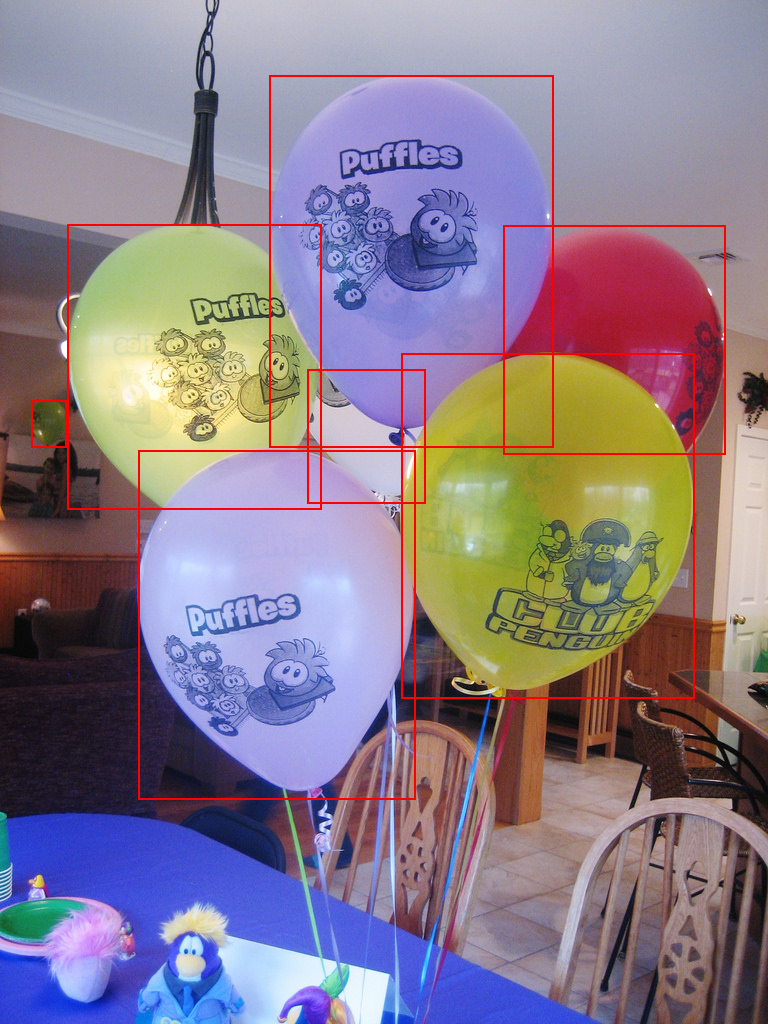

In [13]:
from pathlib import Path

root_path = './datasets/balloon/'
data_root = Path(root_path)

train_imgs = [str(x) for x in (data_root/'images'/'val').rglob("*.jpg") if 'checkpoint' not in str(x)]

img_path = train_imgs[0] 
label_path = img_path.replace('images','labels').replace('.jpg','.txt')
boxes = get_boxes(img_path,label_path)
plot_boxes(Image.open(img_path),boxes)


### 3ÔºåÊï∞ÊçÆÈõÜÈÖçÁΩÆÊñá‰ª∂

‰ªøÁÖß ultralytics/data/yolo/data/datasets ‰∏≠Â∑≤ÊúâÁöÑ‰∏Ä‰∫õyamlÊï∞ÊçÆÈõÜÈÖçÁΩÆÊñá‰ª∂ÔºåÊûÑÂª∫Êàë‰ª¨Ëá™Â∑±ÁöÑÊï∞ÊçÆÈõÜyamlÊñá‰ª∂„ÄÇ


In [22]:
%%writefile balloon.yaml
# Ultralytics YOLO üöÄ, GPL-3.0 license

path: balloon   # dataset root dir
train: images/train  # train images (relative to 'path') 128 images
val: images/val  # val images (relative to 'path') 128 images
test:  # test images (optional)

# Classes
names:
  0: ballon


Overwriting balloon.yaml


### 4ÔºåÊï∞ÊçÆÁÆ°ÈÅì

In [23]:
import torch
from torch.utils.data import DataLoader
from ultralytics.cfg import get_cfg
from ultralytics.utils import DEFAULT_CFG,yaml_load 
from ultralytics.data.utils import check_cls_dataset, check_det_dataset
from ultralytics.data import build_yolo_dataset,build_dataloader

overrides = {'task':'detect',
             'data': 'balloon.yaml',
             'imgsz':640,
             'workers':4
            }
cfg = get_cfg(cfg = DEFAULT_CFG,overrides=overrides)
data_info = check_det_dataset(cfg.data)


In [25]:
ds_train = build_yolo_dataset(cfg,img_path=data_info['train'],batch=cfg.batch,
                              data = data_info,mode='train',rect=False,stride=32)

ds_val = build_yolo_dataset(cfg,img_path=data_info['val'],batch=cfg.batch,data = data_info,
    mode='val',rect=False,stride=32)




train: Scanning /tf/liangyun2/cashier/datasets/balloon/labels/train... 61 images, 2 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 63/63 [00:00<00:00, 2198.95it/s]
train: New cache created: /tf/liangyun2/cashier/datasets/balloon/labels/train.cache
val: Scanning /tf/liangyun2/cashier/datasets/balloon/labels/val... 13 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:00<00:00, 1758.50it/s]
val: New cache created: /tf/liangyun2/cashier/datasets/balloon/labels/val.cache


In [26]:
dl_train = DataLoader(ds_train,batch_size = cfg.batch, num_workers = cfg.workers,
                      collate_fn = ds_train.collate_fn)

dl_val = DataLoader(ds_val,batch_size = cfg.batch, num_workers = cfg.workers,
                      collate_fn = ds_val.collate_fn)


In [27]:
for batch in dl_val:
    break 

In [28]:
batch.keys()

dict_keys(['im_file', 'ori_shape', 'resized_shape', 'ratio_pad', 'img', 'cls', 'bboxes', 'batch_idx'])

## ‰∫åÔºåÂÆö‰πâÊ®°Âûã

ÂèØ‰ª•ÈÄâÊã© yolov8n-seg,yolov8s-seg,yolov8m-seg,yolov8l-seg,yolov8x-segÁ≠âÂÆòÊñπÂÆö‰πâÂ•ΩÁöÑÊ®°ÂûãÁªìÊûÑÔºå

‰πüÂèØ‰ª•ÈÄöËøá‰øÆÊîπyamlÊ®°ÂûãÈÖçÁΩÆÊñá‰ª∂Êù•ÂÆûÁé∞Áî®Êà∑Ëá™ÂÆö‰πâÁöÑÊ®°ÂûãÁªìÊûÑ„ÄÇ

In [32]:
from ultralytics.nn.tasks import DetectionModel

model = DetectionModel(cfg = 'yolov8n.yaml', ch=3, nc=1)
#weights = torch.hub.load_state_dict_from_url('https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n.pt')
weights = torch.load('yolov8n.pt')
model.load(weights['model'])


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

In [34]:
model.args = cfg
model.nc = data_info['nc']  # attach number of classes to model
model.names = data_info['names']


## ‰∏âÔºåËÆ≠ÁªÉÊ®°Âûã

Êàë‰ª¨ÂàÜÂà´ÊºîÁ§∫‰ΩøÁî®ultralyticsÂéüÁîüÊé•Âè£‰ª•Âèä‰ΩøÁî®torchkerasÁöÑKerasModel‰∏§ÁßçÊé•Âè£ËÆ≠ÁªÉÊ®°ÂûãÁöÑÊñπÊ≥ï„ÄÇ

### 1Ôºå‰ΩøÁî®ultralyticsÂéüÁîüÊé•Âè£

Â¶ÇÊûúÊòØ‰ΩøÁî®ultralyticsÁöÑÂéüÁîüÊé•Âè£ÔºåÂè™ÈúÄË¶Å‰ª•‰∏ãÂá†Ë°å‰ª£Á†ÅÂç≥ÂèØ„ÄÇ



In [30]:
from ultralytics import YOLO 
yolo_model = YOLO('yolov8n.pt')

yolo_model.train(data='balloon.yaml',epochs=10)


New https://pypi.org/project/ultralytics/8.0.180 available üòÉ Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.175 üöÄ Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81070MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=balloon.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f138cf99e80>
fitness: 0.36470940405369684
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.35955])
names: {0: 'ballon'}
plot: True
results_dict: {'metrics/precision(B)': 0.8991675157483128, 'metrics/recall(B)': 0.3, 'metrics/mAP50(B)': 0.4111145244267099, 'metrics/mAP50-95(B)': 0.35955327956780647, 'fitness': 0.36470940405369684}
save_dir: PosixPath('runs/detect/train2')
speed: {'preprocess': 0.07174565241887018, 'inference': 0.5171298980712891, 'loss': 0.0008436349722055288, 'postprocess': 0.7206109853891226}

### 2Ôºå‰ΩøÁî®torchkerasÊ¢¶‰∏≠ÊÉÖÁÇâ

In [35]:
#ÊµãËØïlossËÆ°ÁÆóËøáÁ®ã
for batch in dl_train:
    break
    
for key,value in batch.items():
    if isinstance(value,torch.Tensor):
        batch[key] = batch[key].cuda()
    
model = model.cuda()
model.train();
batch['img'] = batch['img'].float()/255.0
loss,_ = model.forward(batch)
loss 

tensor(74.3001, device='cuda:0', grad_fn=<MulBackward0>)

In [38]:
from torchkeras import KerasModel 

#Êàë‰ª¨ÈúÄË¶Å‰øÆÊîπStepRunner‰ª•ÈÄÇÂ∫îYolov8ÁöÑÊï∞ÊçÆÈõÜÊ†ºÂºè

class StepRunner:
    def __init__(self, net, loss_fn, accelerator, stage = "train", metrics_dict = None, 
                 optimizer = None, lr_scheduler = None
                 ):
        self.net,self.loss_fn,self.metrics_dict,self.stage = net,loss_fn,metrics_dict,stage
        self.optimizer,self.lr_scheduler = optimizer,lr_scheduler
        self.accelerator = accelerator
        self.net.train() 

    
    def __call__(self, batch):
        
        batch['img'] = batch['img'].float()/255
        
        #loss
        loss,_ = model.forward(batch)

        #backward()
        if self.optimizer is not None and self.stage=="train":
            self.accelerator.backward(loss)
            self.optimizer.step()
            if self.lr_scheduler is not None:
                self.lr_scheduler.step()
            self.optimizer.zero_grad()
            
        all_loss = self.accelerator.gather(loss).sum()
        
        #losses
        step_losses = {self.stage+"_loss":all_loss.item()}
        
        #metrics
        step_metrics = {}
        
        if self.stage=="train":
            if self.optimizer is not None:
                step_metrics['lr'] = self.optimizer.state_dict()['param_groups'][0]['lr']
            else:
                step_metrics['lr'] = 0.0
        return step_losses,step_metrics
    
KerasModel.StepRunner = StepRunner 


In [39]:
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4) 
keras_model = KerasModel(net = model, 
                         loss_fn = None, 
                         optimizer = optimizer)



<<<<<< ‚ö°Ô∏è cuda is used >>>>>>


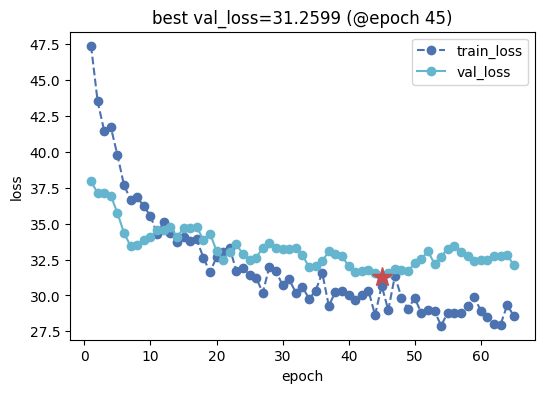

<<<<<< val_loss without improvement in 20 epoch,early stopping >>>>>> 



epoch  train_loss      lr   val_loss
0       1   47.394963  0.0001  37.942341
1       2   43.512836  0.0001  37.134800
2       3   41.449062  0.0001  37.167404
3       4   41.714900  0.0001  36.953270
4       5   39.768025  0.0001  35.728584
..    ...         ...     ...        ...
60     61   28.482508  0.0001  32.465374
61     62   28.039936  0.0001  32.725273
62     63   27.966807  0.0001  32.717834
63     64   29.326236  0.0001  32.815521
64     65   28.586451  0.0001  32.119865

[65 rows x 4 columns]

In [42]:
keras_model.fit(train_data=dl_train,
                val_data=dl_val,
                epochs = 200,
                ckpt_path='checkpoint',
                patience=20,
                monitor='val_loss',
                mode='min',
                plot= True
               )

In [43]:
#ÂÖ≥Èó≠mosaicÂ¢ûÂº∫ÂÜçËÆ≠‰∏ÄÊ¨°
ds_train.close_mosaic(cfg)
keras_model.from_scratch = False

<<<<<< ‚ö°Ô∏è cuda is used >>>>>>


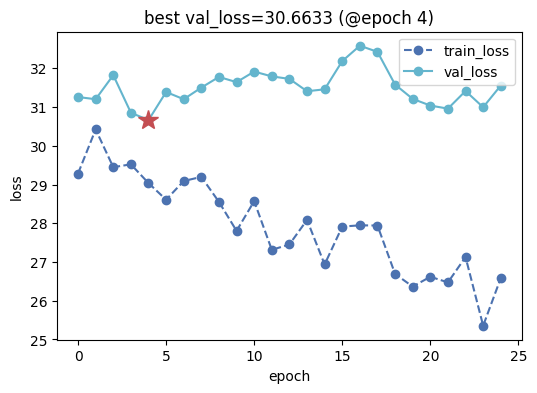

<<<<<< val_loss without improvement in 20 epoch,early stopping >>>>>> 



epoch  train_loss      lr   val_loss
0       0   29.284948  0.0000  31.259914
1       1   30.423128  0.0001  31.203571
2       2   29.448510  0.0001  31.824892
3       3   29.522553  0.0001  30.855499
4       4   29.038334  0.0001  30.663296
5       5   28.608891  0.0001  31.389755
6       6   29.091991  0.0001  31.203611
7       7   29.198014  0.0001  31.503260
8       8   28.552580  0.0001  31.778975
9       9   27.804764  0.0001  31.644163
10     10   28.571892  0.0001  31.917023
11     11   27.315217  0.0001  31.792826
12     12   27.453081  0.0001  31.728472
13     13   28.086950  0.0001  31.409586
14     14   26.937898  0.0001  31.459282
15     15   27.915074  0.0001  32.187977
16     16   27.947629  0.0001  32.584705
17     17   27.942801  0.0001  32.426517
18     18   26.692884  0.0001  31.581316
19     19   26.365534  0.0001  31.211893
20     20   26.619835  0.0001  31.040045
21     21   26.474166  0.0001  30.960390
22     22   27.129491  0.0001  31.415548
23     23   25.355579  0.0001  30.996189
24     24   26.584398  0.0001  31.556967

In [44]:
keras_model.fit(train_data=dl_train,
                val_data=dl_val,
                epochs = 200,
                ckpt_path='checkpoint',
                patience=20,
                monitor='val_loss',
                mode='min',
                mixed_precision='no',
                plot= True
               )

## ÂõõÔºåËØÑ‰º∞Ê®°Âûã

‰∏∫‰∫Ü‰æø‰∫éËØÑ‰º∞ mapÁ≠âÊåáÊ†áÔºåÊàë‰ª¨Â∞ÜÊùÉÈáçÂÜçÊ¨°‰øùÂ≠òÂêéÔºåÁî®ultralyticsÁöÑÂéüÁîüYOLOÊé•Âè£ËøõË°åÂä†ËΩΩÂêéËØÑ‰º∞„ÄÇ


In [45]:
keras_model.evaluate(dl_val)

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  1.50it/s, val_loss=30.7]


{'val_loss': 30.66329574584961}

In [47]:
from ultralytics import YOLO 
keras_model.load_ckpt(keras_model.ckpt_path)
save_dic = dict(model = keras_model.net, train_args =dict(cfg))
torch.save(save_dic, 'best_yolo.pt')



In [48]:
from ultralytics import YOLO 
best_model = YOLO(model = 'best_yolo.pt')
metrics = best_model.val(data = cfg.data )


Ultralytics YOLOv8.0.175 üöÄ Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81070MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 12675 gradients, 8.1 GFLOPs
val: Scanning /tf/liangyun2/cashier/datasets/balloon/labels/val.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 13/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1/1 [00:00<00:00,  1.51it/s]
                   all         13         50      0.796      0.782      0.821      0.719
Speed: 0.1ms preprocess, 4.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val


In [49]:
metrics.results_dict


{'metrics/precision(B)': 0.7962468655256904,
 'metrics/recall(B)': 0.7816096410758827,
 'metrics/mAP50(B)': 0.8212096988818037,
 'metrics/mAP50-95(B)': 0.7185766085203832,
 'fitness': 0.7288399175565253}

In [50]:
import pandas as pd 
df = pd.DataFrame()
df['metric'] = metrics.keys
for i,c in best_model.names.items():
    df[c] = metrics.class_result(i)

df 

metric    ballon
0  metrics/precision(B)  0.796247
1     metrics/recall(B)  0.781610
2      metrics/mAP50(B)  0.821210
3   metrics/mAP50-95(B)  0.718577

## ‰∫îÔºå‰ΩøÁî®Ê®°Âûã


In [51]:
from pathlib import Path 
root_path = './datasets/balloon/'
data_root = Path(root_path)

best_model = YOLO(model = 'best_yolo.pt')


In [52]:
val_imgs = [str(x) for x in (data_root/'images'/'train').rglob("*.jpg") if 'checkpoint' not in str(x)]
img_path = val_imgs[5] 



image 1/1 /tf/liangyun2/cashier/datasets/balloon/images/train/1297451346_5b92bdac08_b.jpg: 640x480 4 ballons, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


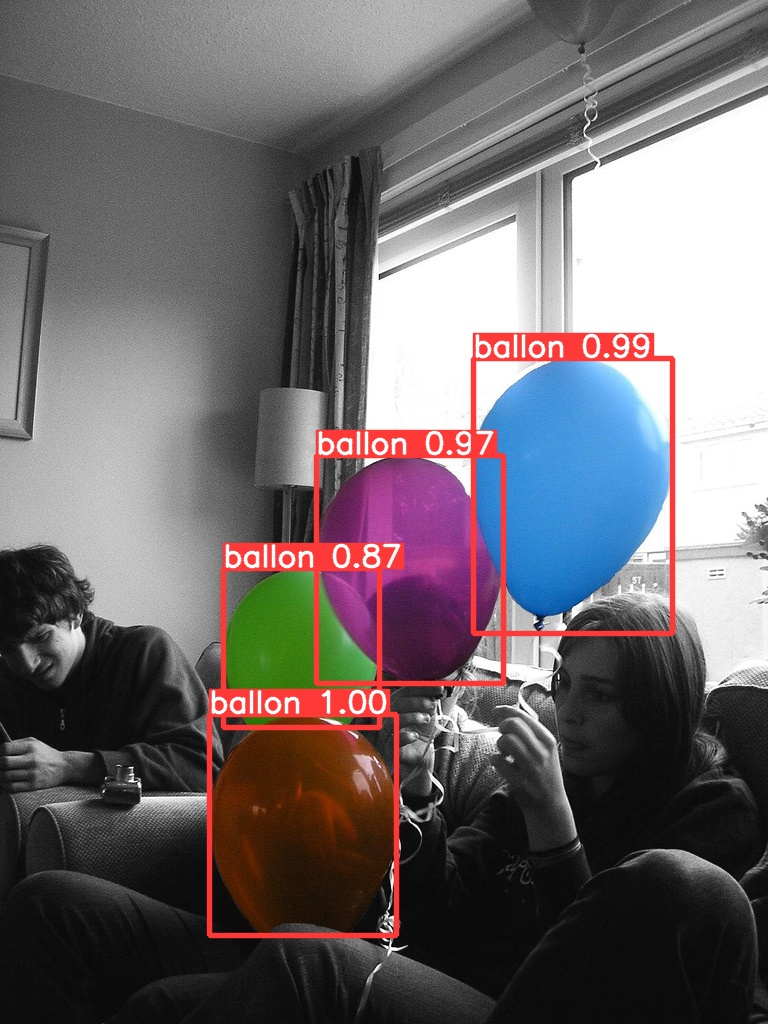

In [53]:
import os 
from PIL import Image 
result = best_model.predict(source = img_path,save=True)
best_model.predictor.save_dir/os.path.basename(img_path)
Image.open(best_model.predictor.save_dir/os.path.basename(img_path))


## ÂÖ≠ÔºåÂØºÂá∫Ê®°Âûã

Export a YOLOv8 model to any format.

Format                  | `format=...**bold text**`         | Model
---                     | ---                       | ---
PyTorch                 | -                         | yolov8n.pt
TorchScript             | `torchscript`             | yolov8n.torchscript
ONNX                    | `onnx`                    | yolov8n.onnx
OpenVINO                | `openvino`                | yolov8n_openvino_model/
TensorRT                | `engine`                  | yolov8n.engine
CoreML                  | `coreml`                  | yolov8n.mlmodel
TensorFlow SavedModel   | `saved_model`             | yolov8n_saved_model/
TensorFlow GraphDef     | `pb`                      | yolov8n.pb
TensorFlow Lite         | `tflite`                  | yolov8n.tflite
TensorFlow Edge TPU     | `edgetpu`                 | yolov8n_edgetpu.tflite
TensorFlow.js           | `tfjs`                    | yolov8n_web_model/
PaddlePaddle            | `paddle`                  | yolov8n_paddle_model/

In [54]:
best_model.export(format='onnx')

Ultralytics YOLOv8.0.175 üöÄ Python-3.8.10 torch-2.0.1+cu117 CPU (Intel Xeon Gold 5318Y 2.10GHz)

PyTorch: starting from 'best_yolo.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (11.7 MB)

ONNX: starting export with onnx 1.13.0 opset 17...
ONNX: export success ‚úÖ 0.7s, saved as 'best_yolo.onnx' (11.7 MB)

Export complete (2.2s)
Results saved to /tf/liangyun2/cashier
Predict:         yolo predict task=detect model=best_yolo.onnx imgsz=640  
Validate:        yolo val task=detect model=best_yolo.onnx imgsz=640 data=balloon.yaml  
Visualize:       https://netron.app


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'best_yolo.onnx'

In [55]:
from ultralytics.yolo.v8.detect.predict import DetectionPredictor
predictor = DetectionPredictor(
    overrides=dict(model='best_yolo.onnx'))

WARNING ‚ö†Ô∏è 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.


In [56]:
results = list(predictor.stream_inference(source=img_path)) 


Ultralytics YOLOv8.0.175 üöÄ Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA A100 80GB PCIe, 81070MiB)
Loading best_yolo.onnx for ONNX Runtime inference...
image 1/1 /tf/liangyun2/cashier/datasets/balloon/images/train/1297451346_5b92bdac08_b.jpg: 640x640 4 ballons, 40.7ms
Speed: 2.3ms preprocess, 40.7ms inference, 12.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/train3


**Â¶ÇÊûúÊú¨È°πÁõÆÂØπ‰Ω†ÊúâÊâÄÂ∏ÆÂä©ÔºåÊÉ≥ÈºìÂä±‰∏Ä‰∏ã‰ΩúËÄÖÔºåËÆ∞ÂæóÁªôÊú¨È°πÁõÆÂä†‰∏ÄÈ¢óÊòüÊòüstar‚≠êÔ∏èÔºåÂπ∂ÂàÜ‰∫´Áªô‰Ω†ÁöÑÊúãÂèã‰ª¨Âñîüòä!** 

Â¶ÇÊûúÂú®torchkerasÁöÑ‰ΩøÁî®‰∏≠ÈÅáÂà∞ÈóÆÈ¢òÔºåÂèØ‰ª•Âú®È°πÁõÆ‰∏≠Êèê‰∫§issue„ÄÇ

Â¶ÇÊûúÊÉ≥Ë¶ÅËé∑ÂæóÊõ¥Âø´ÁöÑÂèçÈ¶àÊàñËÄÖ‰∏éÂÖ∂‰ªñtorchkerasÁî®Êà∑Â∞è‰ºô‰º¥ËøõË°å‰∫§ÊµÅÔºå

ÂèØ‰ª•Âú®ÂÖ¨‰ºóÂè∑ÁÆóÊ≥ïÁæéÈ£üÂ±ãÂêéÂè∞ÂõûÂ§çÂÖ≥ÈîÆÂ≠óÔºö**Âä†Áæ§**„ÄÇ

![](https://tva1.sinaimg.cn/large/e6c9d24egy1h41m2zugguj20k00b9q46.jpg)